# Semantix - Big Data Science

## Projeto Final - Análise de Dados ENEM 2021

**Autor** : Jacqueline de Miranda Kian


## <a name="resumo">  Resumo </a>

O Exame Nacional do Ensino Médio (ENEM), foi instituído em 1998 com o objetivo de avaliar o desempenho escolar dos estudantes ao término da educação básica. Desde 2009, é utilizado como mecanismo de acesso à educação superior. 

Atualmente, as notas do Enem são utilizadas como critério de seleção para ingresso em faculdades públicas, por meio do Sistema de Seleção Unificada (Sisu), para obtenção de bolsa do Programa Universidade para Todos (Prouni) em faculdades particulares e o Financiamento Estudantil (Fies).

Neste análise, será feito o estudo dos microdados do Enem do ano de 2021, que contém informações a respeito das provas, gabaritos, notas e questionário sócio-econôminco respondido pelos inscritos.
Tais dados foram obtidos por meio da fonte: https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem. 


## <a name="indice">  Índice </a>
* [Resumo](#resumo)
* [Índice](#indice)
* [Preparação e Tratamento de Dados](#secao_1)
* [Análise do Perfil dos Participantes](#secao_2)
* [Análise das Notas das Provas](#secao_3)
* [Conclusão](#conclusao)
* [Referências](#refer)

##  <a name="secao_1"> Preparação e Tratamento de Dados </a>
[Voltar ao índice](#indice)

### Importação de Dados

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()
%matplotlib inline

In [2]:
# Configuração de exibição
pd.set_option('display.max_rows', 70)
pd.set_option('display.max_columns', 70)

In [3]:
%%time
data = pd.read_csv("MICRODADOS_ENEM_2021.csv", sep=";", encoding='ISO-8859-1',
                usecols = ['NU_INSCRICAO','TP_FAIXA_ETARIA', 'TP_SEXO', 
                           'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO', 
                           'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
                           'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
                           'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 
                           'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA', 
                           'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
                           'TP_PRESENCA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
                           'TP_LINGUA', 'TP_STATUS_REDACAO', 'NU_NOTA_REDACAO', 
                           'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006', 'Q007', 
                           'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 
                           'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025'])

CPU times: total: 24.4 s
Wall time: 24.9 s


In [4]:
data.head().T

,0,1,2,3,4
NU_INSCRICAO,210053865474,210052384164,210052589243,210052128335,210051353021
TP_FAIXA_ETARIA,5,12,13,3,2
TP_SEXO,F,M,F,M,F
TP_ESTADO_CIVIL,1,1,3,1,1
TP_COR_RACA,1,1,1,3,3
TP_NACIONALIDADE,1,1,1,1,1
TP_ST_CONCLUSAO,1,1,1,2,2
TP_ANO_CONCLUIU,3,11,15,0,0
TP_ESCOLA,1,1,1,2,2
TP_ENSINO,NaN,NaN,NaN,1.0,1.0


Por se tratar de um arquivo grande, um primeiro filtro de colunas  foi feito diretamente na leitura dos dados, baseado na descrição dos dados obtida no arquivo de metadados "Dicionário_Microdados_Enem_2021".

Optou-se por não carregar as colunas abaixo:
* NU_INSCRICAO : cada registro corresponde a um aluno. Não é necessário armazenar o número de inscrição.
* NU_ANO : todos os registros referem-se ao ano 2021
* TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT, TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT: Não será feita análise de acerto de perguntas individualmente, dada que há informação consolidada da nota do candidato.
* NU_NOTA_COMP1, NU_NOTA_COMP2, NU_NOTA_COMP3, NU_NOTA_COMP4, NU_NOTA_COMP5: Não será feita análise de competências individuais de redação, apenas a nota total.
* CO_PROVA_CN, CO_PROVA_CH, CO_PROVA_LC, CO_PROVA_MT: Não será feita análise distinguindo os tipos de prova.

In [5]:
print('Número total de inscritos:', data.shape[0])

Número total de inscritos: 3389832


### Limpeza da Base de Dados

No primeiro dia do Exame, foram aplicadas as provas de Linguagens e Códigos (LC), Redação e Ciências Humanas (CH). No segundo dia, foram aplicadas as provas de Ciências da Natureza (CN) e Matemática (MT). 
Observa-se que as colunas de presença encontram-se redundantes dentre as matérias do mesmo dia, então uma coluna foi removida.

In [6]:
(data['TP_PRESENCA_CN'] == data['TP_PRESENCA_MT']).all()

True

In [7]:
(data['TP_PRESENCA_LC'] == data['TP_PRESENCA_CH']).all()

True

In [8]:
data = data.drop(columns=['TP_PRESENCA_CN', 'TP_PRESENCA_LC'])

In [9]:
data = data.rename(columns={'TP_PRESENCA_CH': 'TP_PRESENCA_D1', 'TP_PRESENCA_MT': 'TP_PRESENCA_D2'})

Percebe-se também que as colunas com código do estado (CO_UF_ESC, CO_UF_PROVA ) e sigla do estado possuem informações redundantes. Desta forme, será mantida apenas a sigla.

In [10]:
data = data.drop(columns=['CO_UF_PROVA', 'CO_UF_ESC'])

### Tratamento de dados ausentes

In [11]:
data.isnull().sum()

NU_INSCRICAO                    0
TP_FAIXA_ETARIA                 0
TP_SEXO                         0
TP_ESTADO_CIVIL                 0
TP_COR_RACA                     0
TP_NACIONALIDADE                0
TP_ST_CONCLUSAO                 0
TP_ANO_CONCLUIU                 0
TP_ESCOLA                       0
TP_ENSINO                 2293004
IN_TREINEIRO                    0
CO_MUNICIPIO_ESC          2576026
NO_MUNICIPIO_ESC          2576026
SG_UF_ESC                 2576026
TP_DEPENDENCIA_ADM_ESC    2576026
TP_LOCALIZACAO_ESC        2576026
TP_SIT_FUNC_ESC           2576026
CO_MUNICIPIO_PROVA              0
NO_MUNICIPIO_PROVA              0
SG_UF_PROVA                     0
TP_PRESENCA_D1                  0
TP_PRESENCA_D2                  0
NU_NOTA_CN                1143988
NU_NOTA_CH                1011453
NU_NOTA_LC                1011453
NU_NOTA_MT                1143988
TP_LINGUA                       0
TP_STATUS_REDACAO         1011453
NU_NOTA_REDACAO           1011453
Q001          

In [12]:
data['TP_ENSINO'].isnull().sum()/data.shape[0]

0.6764358823682117

In [13]:
data['CO_MUNICIPIO_ESC'].isnull().sum()/data.shape[0]

0.7599273356319723

Observa-se que existe uma grande quantidade de dados ausentes relacionados às informações sobre a escola do candidato (cerca de 76% dos dados) e sobre o tipo de ensino (aproximadamente 68%).
Deste modo, estas colunas serão desconsideradas na análise.

In [14]:
data = data.drop(columns=['TP_ENSINO', 'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'SG_UF_ESC',
                      'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC'])

No questionário sócio-econômico (colunas Q001-Q025) existem apenas 2 valores ausentes.
Para que o número absoluto do total de candidatos seja mantido, estes valores ausentes serão substituidos pela moda de cada coluna.

In [15]:
for column in ['Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 
               'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025']:
    data[column].fillna(data[column].mode()[0], inplace=True)

Existem mais de 1 milhão de entradas nulas relacionadas às notas dos participantes.
Observa-se que estes valores ausentes correspondem aos candidatos que não compareceram ou que foram eliminados em pelo menos um dos dias de prova. 
Deste modo, serão mantidos valores nulos de notas, pois representam uma informação diferente de nota=0 (que corresponde a responder todas as perguntas incorretamente). Porém, estes valores nulos serão desconsiderados na etapa final de análise do desempenho dos participantes.

In [16]:
df_provas = data[['TP_PRESENCA_D1', 'TP_PRESENCA_D2',
                  'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 
                  'NU_NOTA_MT', 'TP_STATUS_REDACAO', 'NU_NOTA_REDACAO']]

In [17]:
df_presente = df_provas[(df_provas['TP_PRESENCA_D1'] == 1) & (df_provas['TP_PRESENCA_D2'] == 1)]

In [18]:
## Não há notas nulas para participantes que estiveram presentes nos dois dias
df_presente[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 
             'TP_STATUS_REDACAO', 'NU_NOTA_REDACAO' ]].isnull().sum()

NU_NOTA_CN           0
NU_NOTA_CH           0
NU_NOTA_LC           0
NU_NOTA_MT           0
TP_STATUS_REDACAO    0
NU_NOTA_REDACAO      0
dtype: int64

Salvar arquivo parcial, com tratamento de dados feito até o momento.

In [19]:
%%time
data.to_csv('dados_parcial_enem2021.csv', index = False)

CPU times: total: 35.9 s
Wall time: 35.9 s


### Tratamento de Variáveis Categóricas

Tradução dos valores das variáveis categóricas, de acordo com a tabela de metadados, para facilitar visualização.

* Dados dos inscritos

In [20]:
data['TP_SEXO'] = data['TP_SEXO'].astype('category')

In [21]:
dtype = pd.CategoricalDtype(['Não Informado', 'Solteiro', 'Casado', 'Divorciado', 'Viúvo'], ordered = False)
data['TP_ESTADO_CIVIL'] = pd.Categorical.from_codes(codes=data['TP_ESTADO_CIVIL'], dtype= dtype)

In [22]:
dtype = pd.CategoricalDtype(['Não Declarado', 'Branca', 'Preta', 'Parda', 'Amarela', 'Indígena', 'Sem info'], ordered = False)
data['TP_COR_RACA'] = pd.Categorical.from_codes(codes=data['TP_COR_RACA'], dtype= dtype)

In [23]:
dtype = pd.CategoricalDtype(['Não Informada', 'Brasileiro', 'Brasileiro Naturalizado', 'Estrangeiro', 'Br nascido no exterior'], ordered = False)
data['TP_NACIONALIDADE'] = pd.Categorical.from_codes(codes=data['TP_NACIONALIDADE'], dtype= dtype)

In [24]:
dtype = pd.CategoricalDtype(['Concluido', 'Cursando - conclusão 2021', 'Cursando', 'Não concluido e não cursando'], ordered = False)
data['TP_ST_CONCLUSAO'] = pd.Categorical.from_codes(codes=data['TP_ST_CONCLUSAO']-1, dtype= dtype)

In [25]:
dtype = pd.CategoricalDtype(['Não Respondeu', 'Pública', 'Privada'], ordered = False)
data['TP_ESCOLA'] = pd.Categorical.from_codes(codes=data['TP_ESCOLA']-1, dtype= dtype)

In [26]:
data['IN_TREINEIRO'] = data['IN_TREINEIRO'].map({ 0 : 'Não', 1 : 'Sim'})

* Dados das provas e da redação

In [27]:
data['TP_PRESENCA_D1'] = data['TP_PRESENCA_D1'].map({ 0 : 'Faltou', 1 : 'Presente', 2: 'Eliminado'})
data['TP_PRESENCA_D2'] = data['TP_PRESENCA_D2'].map({ 0 : 'Faltou', 1 : 'Presente', 2: 'Eliminado'})

In [28]:
redacao = {1:'Sem problemas', 2:'Anulada', 3: 'Cópia Texto Motivador', 4: 'Em Branco', 
           6: 'Fuga ao tema', 7: 'Não atendimento ao tipo textual', 8: 'Texto insuficiente', 
           9: 'Parte desconectada' }
data['TP_STATUS_REDACAO'] = data['TP_STATUS_REDACAO'].map(redacao)

In [29]:
#Formatar tipo das colunas do questionário sócio-econômico

for column in ['Q001', 'Q002', 'Q003', 'Q004', 'Q006',
       'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015',
       'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024',
       'Q025']:
    data[column] = pd.Categorical(data[column])   

In [30]:
#Q005 -> número de residentes na casa -> tipo inteiro

data['Q005'] = data['Q005'].astype(int)

Salvar a base de dados reduzida em arquivo.

In [31]:
%%time
data.to_csv('dados_enem2021.csv', index = False)

CPU times: total: 39.4 s
Wall time: 39.4 s


##  <a name="secao_2"> Análise do Perfil dos Candidatos Inscritos </a>
[Voltar ao índice](#indice)

**Características demográficas**

In [32]:
data['TP_SEXO'] = data['TP_SEXO'].map({'F':'Feminino', 'M':'Masculino'})
data['TP_SEXO'].value_counts(normalize=True)

Feminino     0.616705
Masculino    0.383295
Name: TP_SEXO, dtype: float64

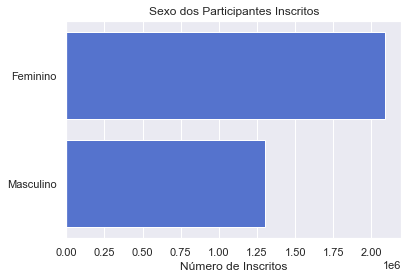

In [33]:
ax = sns.countplot(y = 'TP_SEXO',data =data, color ='royalblue')
ax.set(ylabel=None)
plt.xlabel('Número de Inscritos')
plt.title('Sexo dos Participantes Inscritos')
plt.show()

In [34]:
data['TP_ESTADO_CIVIL'].value_counts(normalize=True)

Solteiro         0.883795
Casado           0.057904
Não Informado    0.041191
Divorciado       0.015972
Viúvo            0.001139
Name: TP_ESTADO_CIVIL, dtype: float64

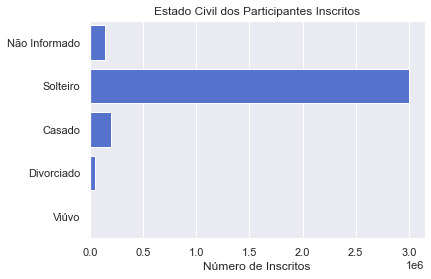

In [35]:
ax = sns.countplot(y = 'TP_ESTADO_CIVIL',  data =data, color ='royalblue')
ax.set(ylabel=None)
plt.xlabel('Número de Inscritos')
plt.title('Estado Civil dos Participantes Inscritos')
plt.show()

In [36]:
data['TP_COR_RACA'].value_counts(normalize=True)

Parda            0.429949
Branca           0.401865
Preta            0.121334
Não Declarado    0.020989
Amarela          0.020205
Indígena         0.005657
Sem info         0.000001
Name: TP_COR_RACA, dtype: float64

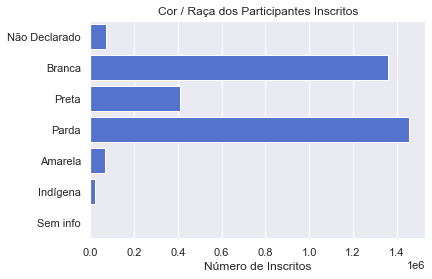

In [37]:
ax = sns.countplot(y = 'TP_COR_RACA',  data =data, color ='royalblue')
ax.set(ylabel=None)
plt.xlabel('Número de Inscritos')
plt.title('Cor / Raça dos Participantes Inscritos')
plt.show()

In [38]:
data['TP_NACIONALIDADE'].value_counts(normalize=True)

Brasileiro                 0.976708
Brasileiro Naturalizado    0.019330
Br nascido no exterior     0.001925
Estrangeiro                0.001346
Não Informada              0.000691
Name: TP_NACIONALIDADE, dtype: float64

In [39]:
bins= [0,1.9,5.9,10.9,11.9,12.9,13.9,14.9,15.9,16.9,17.9,18.9,19.9,20.9]
labels = ['Menor que 17', '17-20', '21-25','26-30','31-35','36-40','41-45','46-50','51-55','56-60','61-65','66-70','Maior que 70']
idade = pd.cut(data['TP_FAIXA_ETARIA'], bins=bins, labels=labels, right=False)

In [40]:
idade.value_counts(normalize= True)

17-20           0.579831
21-25           0.167164
Menor que 17    0.080924
26-30           0.067134
31-35           0.038570
36-40           0.027457
41-45           0.017332
46-50           0.010563
51-55           0.006066
56-60           0.003187
61-65           0.001210
66-70           0.000396
Maior que 70    0.000165
Name: TP_FAIXA_ETARIA, dtype: float64

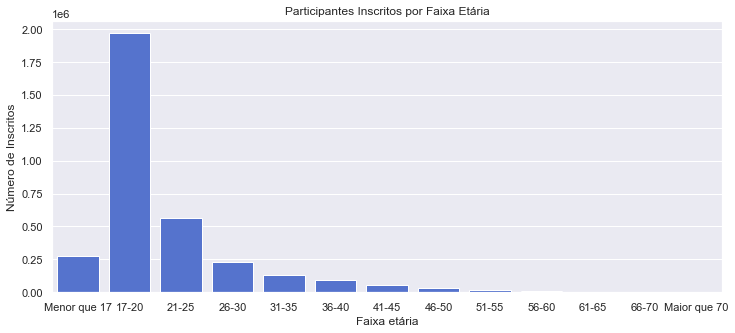

In [41]:
plt.figure(figsize = [12, 5])
sns.countplot(x= idade, color ='royalblue')
plt.xlabel('Faixa etária')
plt.ylabel('Número de Inscritos')
plt.title('Participantes Inscritos por Faixa Etária')
plt.show()

In [42]:
idade_detalhe  = data[(data['TP_FAIXA_ETARIA']<11)&(data['TP_FAIXA_ETARIA']>1)]['TP_FAIXA_ETARIA']+ 15

In [43]:
idade_detalhe.value_counts(normalize=True)

18    0.276190
17    0.245157
19    0.155869
20    0.099001
21    0.069934
22    0.052149
23    0.039721
24    0.033861
25    0.028118
Name: TP_FAIXA_ETARIA, dtype: float64

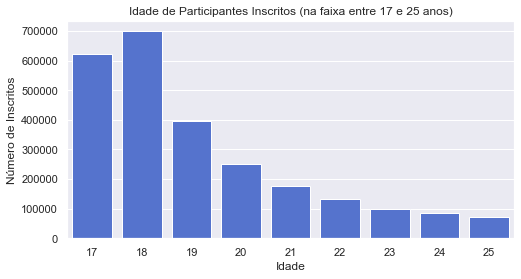

In [44]:
plt.figure(figsize = [8, 4])
sns.countplot(x=idade_detalhe, color ='royalblue')
plt.ylabel('Número de Inscritos')
plt.xlabel('Idade')
plt.title('Idade de Participantes Inscritos (na faixa entre 17 e 25 anos)')
plt.show()

Observou-se que a maioria dos candidatos inscritos no ENEM 2021 são brasileiros e solteiros.
Cerca de 62% declaram-se como gênero feminino e 38% como masculino. 43% dos participantes declararam raça/ cor parda, 40% raça branca e 12.% raça preta.

A maioria dos candidatos possui a idade de 18 anos, sendo a faixa etária de 17 a 20 anos correspondente a 58% dos inscritos. Após esta faixa,o número de participantes tende a diminuir conforme a idade aumenta.


**Informações relacionadas ao ensino médio do candidato.**

In [45]:
data['IN_TREINEIRO'].value_counts(normalize=True)

Não    0.871029
Sim    0.128971
Name: IN_TREINEIRO, dtype: float64

In [46]:
data['TP_ST_CONCLUSAO'].value_counts(normalize=True)

Concluido                       0.527865
Cursando - conclusão 2021       0.339503
Cursando                        0.128971
Não concluido e não cursando    0.003662
Name: TP_ST_CONCLUSAO, dtype: float64

In [47]:
((data['TP_ST_CONCLUSAO']=='Cursando')&(data['IN_TREINEIRO']=='Não')).any()

False

Percebe-se que há informações redundates entre estas duas colunas, onde o estado de conclusão "CURSANDO", equivale a um candidato do tipo "TREINEIRO".

In [48]:
data['TP_ST_CONCLUSAO'] = data['TP_ST_CONCLUSAO'].replace('Cursando','Cursando = Treineiro')

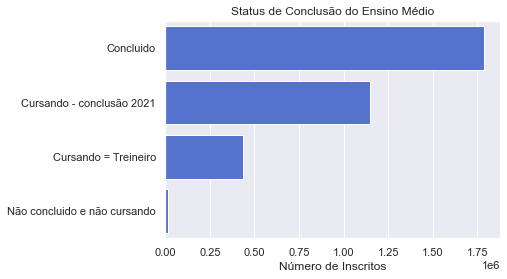

In [49]:
sns.countplot(y = 'TP_ST_CONCLUSAO',  data =data, color ='royalblue')
plt.ylabel('')
plt.xlabel('Número de Inscritos')
plt.title('Status de Conclusão do Ensino Médio')
plt.show()

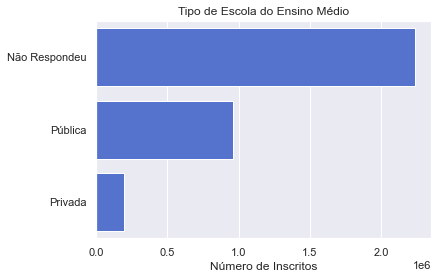

In [50]:
sns.countplot(y = 'TP_ESCOLA',  data =data, color ='royalblue')
plt.ylabel('')
plt.xlabel('Número de Inscritos')
plt.title('Tipo de Escola do Ensino Médio')
plt.show()

In [51]:
(data['TP_ESCOLA']=='Pública').sum()/((data['TP_ESCOLA']=='Privada').sum())

4.986428705187158

Dentre os candidatos que informaram o tipo de escola frequentada durante o ensino médio, há quase 5 vezes mais candidatos de escolas públicas do que escolas privadas. 

**Informações a respeito do local de prova**

Distribuição por estado:

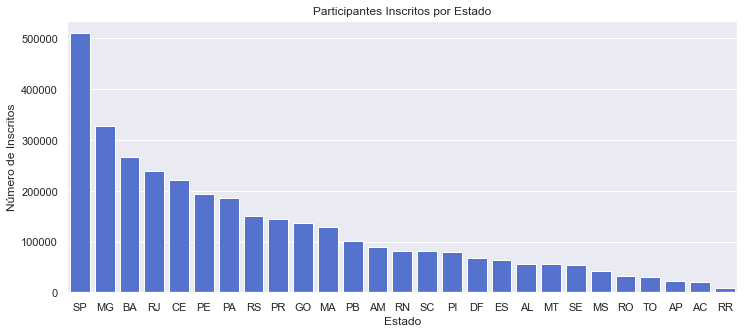

In [52]:
plt.figure(figsize = [12, 5])
sns.countplot(x = 'SG_UF_PROVA',  data =data,
              order = data['SG_UF_PROVA'].value_counts().index, color ='royalblue' )
plt.xlabel('Estado')
plt.ylabel('Número de Inscritos')
plt.title('Participantes Inscritos por Estado')
plt.show()

Para analisar distribuição por região, é necessário criar uma nova coluna 'REGIAO_PROVA', para segmentar os inscritos por região.

In [53]:
regioes = {'SP':'Sudeste', 'MG':'Sudeste','RJ':'Sudeste','ES':'Sudeste', 
           'RS':'Sul','PR':'Sul','SC':'Sul', 
           'GO':'Centro-Oeste','DF':'Centro-Oeste','MT':'Centro-Oeste','MS':'Centro-Oeste',
           'BA':'Nordeste','CE':'Nordeste','PE':'Nordeste','MA':'Nordeste','PB':'Nordeste','RN':'Nordeste','PI':'Nordeste',
           'AL':'Nordeste','SE':'Nordeste',
           'PA':'Norte','AM':'Norte','RO':'Norte','AC':'Norte','RR':'Norte','AP':'Norte','TO':'Norte'}

In [54]:
data['REGIAO_PROVA'] = data['SG_UF_PROVA'].map(regioes)

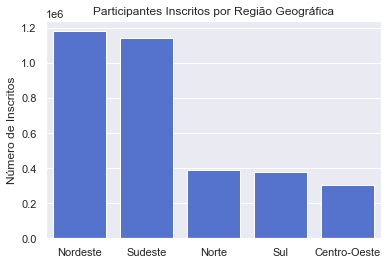

In [55]:
sns.countplot(x = 'REGIAO_PROVA',  data =data,
              order = data['REGIAO_PROVA'].value_counts().index, color ='royalblue')
plt.xlabel('')
plt.ylabel('Número de Inscritos')
plt.title('Participantes Inscritos por Região Geográfica')
plt.show()

In [56]:
municipios = data['CO_MUNICIPIO_PROVA'].nunique()
print("O ENEM foi aplicado em", municipios, 'munícipios.')

O ENEM foi aplicado em 1747 munícipios.


### Questionário Sócio-Econômico

Os candidatos respodem a um questionário sócio-econômico que contém 25 questões. As respostas são classificadas com letras em ordem alfabética, onde a letra 'A' representa características equivalentes a um menor grau de instrução, renda familiar ou quantidade de equipamentos que possui.

In [57]:
economico = data[['Q001', 'Q002', 'Q003', 'Q004',
       'Q005', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013',
       'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022',
       'Q023', 'Q024', 'Q025']]

In [58]:
escolaridade = 'A = Nunca estudou. \n\
B = Não completou a 4ª série/5º ano do Ensino Fundamental.\n\
C = Completou a 4ª série/5º ano mas não completou a 8ª série/9º ano do Ensino Fundamental.\n\
D = Completou a 8ª série/9º ano do Ensino Fundamental mas não completou o Ensino Médio.\n\
E = Completou o Ensino Médio mas não completou a Faculdade.\n\
F = Completou a Faculdade mas não completou a Pós-graduação.\n\
G = Completou a Pós-graduação.\n\
H = Não sei.'

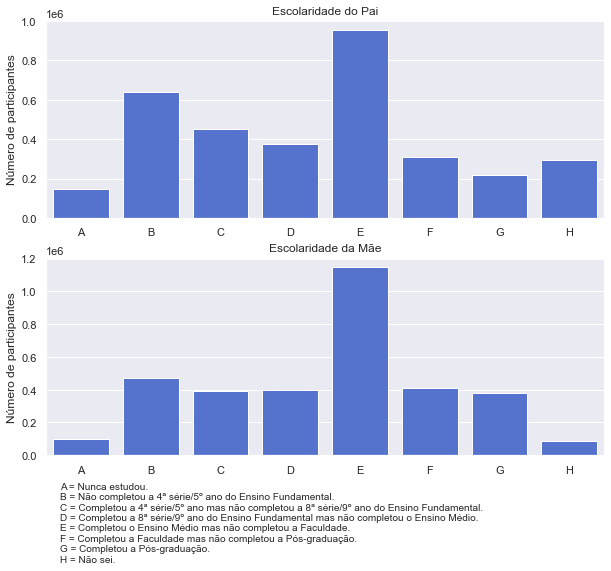

In [59]:
plt.figure(figsize = [10,8])
plt.subplot(2, 1, 1)
ax = sns.countplot(x = 'Q001', data = economico, color ='royalblue')
plt.xlabel('')
plt.ylabel('Número de participantes')
plt.title('Escolaridade do Pai')

plt.subplot(2, 1, 2)
ax = sns.countplot(x = 'Q002', data = economico, color ='royalblue')
plt.xlabel('')
plt.ylabel('Número de participantes')
plt.title('Escolaridade da Mãe')
ax.text(x = -0.3, y = -650000, s = escolaridade)
plt.show()

In [60]:
renda = 'A = Nenhuma Renda, \n\
B = Até R\\$ 1.100,00 \n\
C = De R\$ 1.100,01 até R\$ 1.650,00 \n\
D = De R\$ 1.650,01 até R\$ 2.200,00 \n\
E = De R\$ 2.200,01 até R\$ 2.750,00 \n\
F = De R\$ 2.750,01 até R\$ 3.300,00 \n\
G = De R\$ 3.300,01 até R\$ 4.400,00 \n\
H = De R\$ 4.400,01 até R\$ 5.500,00 \n\
I = De R\$ 5.500,01 até R\$ 6.600,00 \n\
J = De R\$ 6.600,01 até R\$ 7.700,00 \n\
K = De R\$ 7.700,01 até R\$ 8.800,00 \n\
L = De R\$ 8.800,01 até R\$ 9.900,00 \n\
M = De R\$ 9.900,01 até R\$ 11.000,00 \n\
N = De R\$ 11.000,01 até R\$ 13.200,00 \n\
O = De R\$ 13.200,01 até R\$ 16.500,00 \n\
P = De R\$ 16.500,01 até R\$ 22.000,00 \n\
Q = Acima de R\$ 22.000,00.'


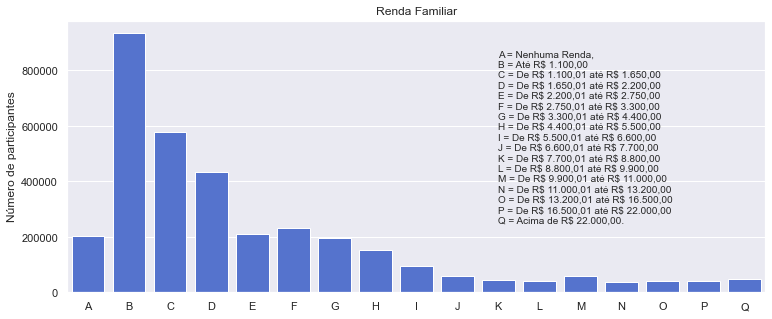

In [61]:
plt.figure(figsize = [12.5,5])
ax = sns.countplot(x = 'Q006', data = economico, color ='royalblue')
plt.xlabel('')
plt.ylabel('Número de participantes')
plt.title('Renda Familiar')
ax.text(x = 10, y = 250000, s =renda )
plt.show()

A maior parte dos inscritos no ENEM possui pai / mãe com escolaridade Ensino Médio completo porém sem Ensino Superior concluído.
A renda familiar mais comum entre os inscritos está na faixa de Até R$ 1.100,00. 

### Notas

Primeiramente, será avaliado o índice de comparecimento a ambos os dias de prova.

In [62]:
#Candidatos presentes nos dois dias de prova
((data['TP_PRESENCA_D1']=='Presente')&(data['TP_PRESENCA_D2']=='Presente')).sum()/data.shape[0]

0.6602412744938392

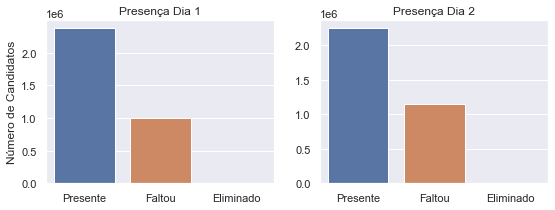

In [63]:
plt.figure(figsize=[9,3])
plt.subplot(1, 2, 1)
ax = sns.countplot(x=data['TP_PRESENCA_D1'],order=['Presente','Faltou', 'Eliminado'])
ax.set(xlabel=None)
plt.ylabel("Número de Candidatos")
plt.title('Presença Dia 1')
plt.subplot(1, 2, 2)
ax = sns.countplot(x=data['TP_PRESENCA_D2'],order=['Presente','Faltou', 'Eliminado'])
ax.set(xlabel=None, ylabel =None)
plt.title('Presença Dia 2')
plt.show()

Observa-se que apenas 66% dos candidatos estiveram presentes nos dois dias prova.

As notas dos candidatos são divididas entre as quatro áreas de conhecimento: linguagens e códigos (LC), ciências humanas (CH), ciências da natureza (CN) e matemática (MT) e a nota de redação. 
Para uso como critério de seleção, cada instituição pode atribuir um peso para cada nota e assim calcular uma nota global através de média ponderada.
Neste caso, iremos considerar que todas as notas possuem o mesmo peso, para geral um campo 'NOTA_GERAL', a fim de realizar comparações.

In [64]:
data['NOTA_GERAL'] = (data['NU_NOTA_CN']+ data['NU_NOTA_CH']+ data['NU_NOTA_LC']+ data['NU_NOTA_MT'] + data['NU_NOTA_REDACAO'])/5.0

In [65]:
colunas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'NOTA_GERAL', 'TP_STATUS_REDACAO']
notas = data[colunas]

In [66]:
notas.describe().applymap("{0:.1f}".format)

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,NOTA_GERAL
count,2245844.0,2378379.0,2378379.0,2245844.0,2378379.0,2238107.0
mean,491.8,519.9,502.6,535.1,613.5,535.5
std,80.6,95.8,79.2,110.6,190.7,89.0
min,0.0,0.0,0.0,0.0,0.0,0.0
25%,431.0,445.4,447.6,444.7,520.0,471.4
50%,482.0,521.9,505.9,515.4,600.0,527.3
75%,545.8,589.3,558.8,613.9,740.0,594.5
max,867.1,846.9,826.1,953.1,1000.0,862.7


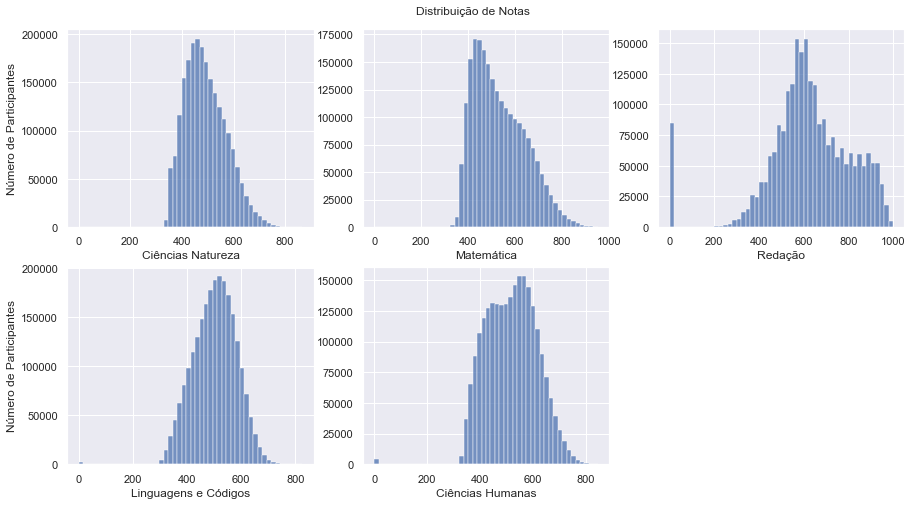

In [67]:
fig =plt.figure(figsize=[15,8])
plt.subplot(2, 3, 1)
ax = sns.histplot(notas['NU_NOTA_CN'], bins = 50)
ax.set(xlabel = 'Ciências Natureza', ylabel = 'Número de Participantes')
plt.subplot(2, 3, 2)
ax = sns.histplot(notas['NU_NOTA_MT'], bins = 50)
ax.set(xlabel = 'Matemática', ylabel = None)
plt.subplot(2, 3, 3)
ax = sns.histplot(notas['NU_NOTA_REDACAO'], bins = 50)
ax.set(xlabel = 'Redação', ylabel = None)
plt.subplot(2, 3, 4)
ax =sns.histplot(notas['NU_NOTA_LC'], bins = 50)
ax.set(xlabel = 'Linguagens e Códigos', ylabel = 'Número de Participantes')
plt.subplot(2, 3, 5)
ax = sns.histplot(notas['NU_NOTA_CH'], bins = 50)
ax.set(xlabel = 'Ciências Humanas', ylabel = None)
fig.suptitle('Distribuição de Notas', y =0.92)
plt.show()

In [68]:
redacao_1000 = (data['NU_NOTA_REDACAO']==1000).sum()
redacao_0 = (data['NU_NOTA_REDACAO']==0).sum()
print('Participantes com nota máxima :', redacao_1000)
print('Participantes com nota zero :', redacao_0)

Participantes com nota máxima : 22
Participantes com nota zero : 84582


In [69]:
redacao_zero = notas[notas['TP_STATUS_REDACAO'] != 'Sem problemas']['TP_STATUS_REDACAO'].value_counts()

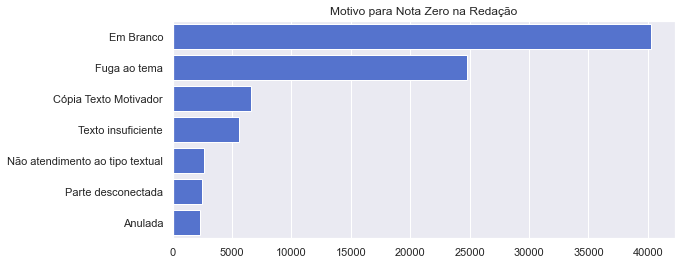

In [70]:
plt.figure(figsize = [9,4])
sns.barplot(y=redacao_zero.index, x=redacao_zero.values, color ='royalblue')
plt.title('Motivo para Nota Zero na Redação')
plt.show()

Relação entre notas de cada área

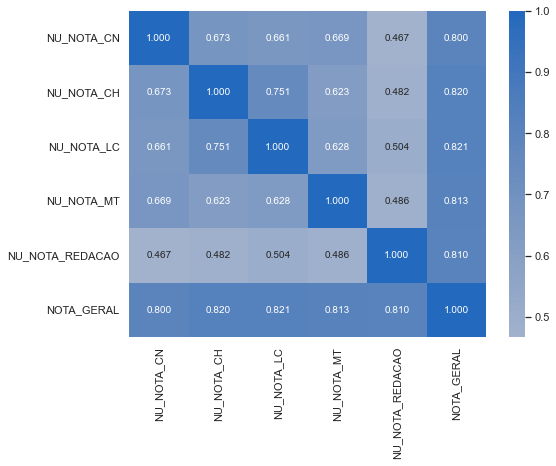

In [71]:
plt.figure(figsize = [8, 6])
sns.heatmap(notas.corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()


Percebe-se que há correlação positiva entre as notas das quatro provas e a redação feitas por um candidato.  Esta correlação é mais forte quando considera-se apenas as provas objetivas e não se considera a redação.

##  <a name="secao_3"> Análise Relação entre Desempenho e Perfil de Candidato </a>
[Voltar ao índice](#indice)

Para esta análise será considerado o desempenho apenas dos participantes presentes nos dois dias de prova.
Deseja-se quais características do candidatos podem estar relacionadas a um melhor desempenho, representado pela nota geral, gerada anteriormente.

In [72]:
#Remover dados nulos de notas
data = data.dropna()

In [73]:
def boxplot_nota(coluna, label, legenda =None, x=8, y=500):
    sns.boxplot(x= coluna, y='NOTA_GERAL', data=data)
    plt.ylabel('Nota Geral')
    plt.xlabel(None)
    plt.title('Nota Geral por '+label)
    if legenda:
        plt.text(x=x,y=y, s=legenda)
    plt.show()

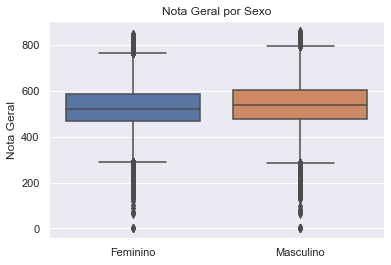

In [74]:
boxplot_nota('TP_SEXO', 'Sexo')

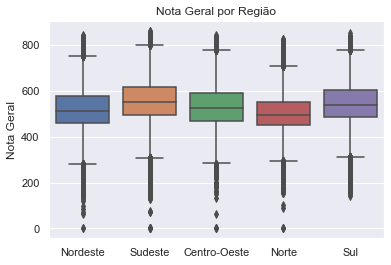

In [75]:
boxplot_nota('REGIAO_PROVA', 'Região')

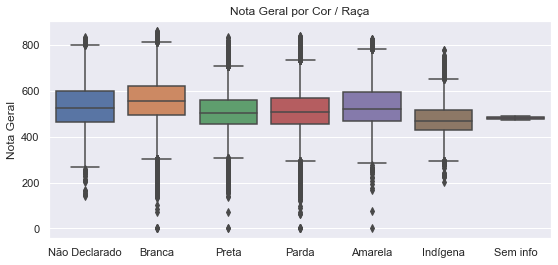

In [76]:
plt.figure(figsize =[9,4])
boxplot_nota('TP_COR_RACA', 'Cor / Raça')

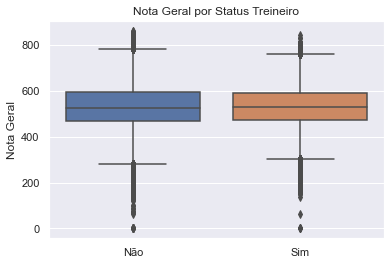

In [77]:
boxplot_nota('IN_TREINEIRO', 'Status Treineiro')

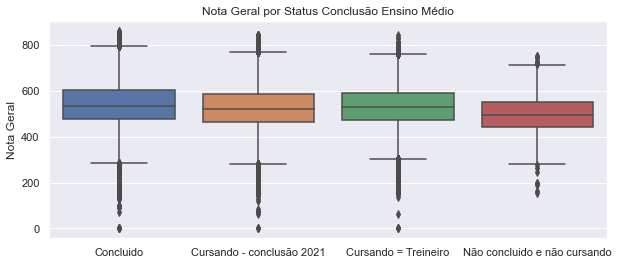

In [78]:
plt.figure(figsize = [10,4])
boxplot_nota('TP_ST_CONCLUSAO', 'Status Conclusão Ensino Médio')

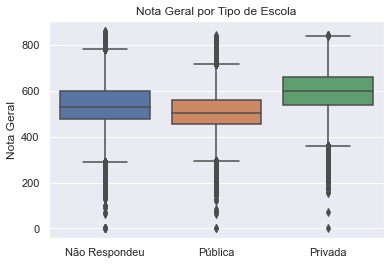

In [79]:
boxplot_nota('TP_ESCOLA', 'Tipo de Escola')

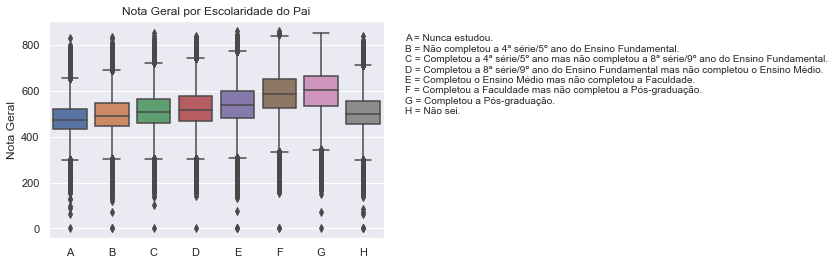

In [80]:
boxplot_nota('Q001', 'Escolaridade do Pai', legenda = escolaridade)

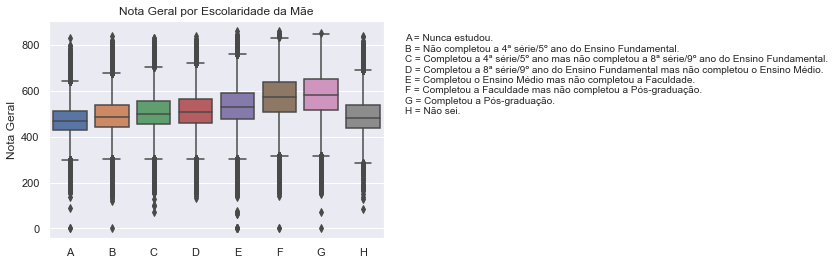

In [81]:
boxplot_nota('Q002', 'Escolaridade da Mãe', legenda = escolaridade)

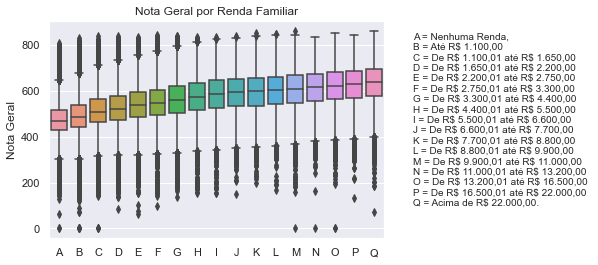

In [82]:
boxplot_nota('Q006', 'Renda Familiar', x=18, y= 100, legenda = renda)

Em geral, o desempenho de alunos que estudaram em escolas privadas mostra-se superior aos de escolas públicas.
O desempenho dos candidatos parece ter influência de condições sócio-econômicas, sendo que é possível observar tendência de aumento da nota obtida com o aumento de escolaridade do pai e/ou da mãe e também com aumento da renda mensal familiar.

##  <a name="conclusao"> Conclusão </a>
[Voltar ao índice](#indice)

* 3389832 pessoas se inscreveram no ENEM 2021, e apenas 66% estiveram presentes nos dois dias de prova.
* 62% dos candidatos inscritos são do sexo feminino e 38% do sexo masculino e 97,7% tem nacionalidade brasileira
* Dentre as raças declaradas, há predominância de candidatos da raça branca e da raça parda.
* A faixa etária entre 17-20 anos concentra cerca de 58% dos candidatos. Após esta faixa,o número de participantes tende a diminuir conforme a idade aumenta.

* O ENEM foi aplicado em todos os estados brasileiros, e em 1747 municípios. 
* O estado de São Paulo teve o maior número de inscritos.
* A região Nordeste teve o maior número de inscritos.

* Observa-se uma tendência de aumento da nota obtida com o aumento de escolaridade dos pais e aumento da renda mensal familiar.
